# Description


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

There are 16 features given namely  Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors.

These features represents data recorded during the matches which shows performance of players.

We have to train a model which can predict the number of wins given the above 16 features.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
# Importing Dataset into a Dataframe

baseball=pd.read_csv('baseball.csv')

# Overview of the dataset

In [123]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [124]:
baseball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
baseball.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

# Checking Null Values

In [7]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present in the dataset

In [126]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [125]:
#Checking Data Types

baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Data type is either Int64 or Float64

In [127]:
#Checking Shape

baseball.shape

(30, 17)

In [128]:


baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As we see mean and median of the columns are not at much difference. Very little skewness is observed.No major difference between 75th Percentile and the Max value is observed.This denote absence of extreme outliers. 

# Analysis of Individual Features

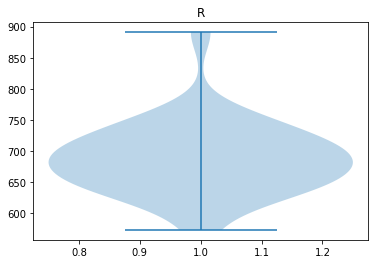

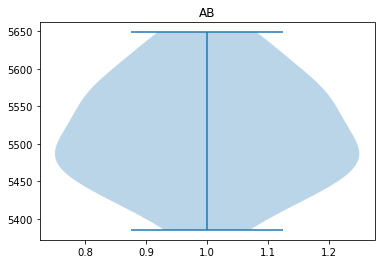

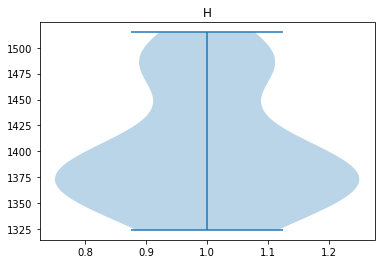

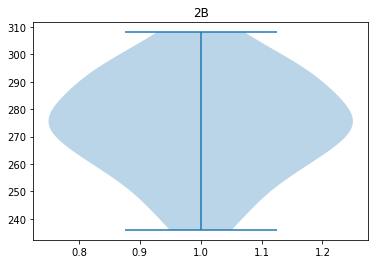

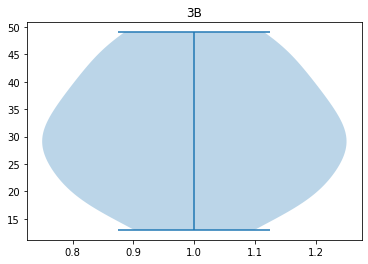

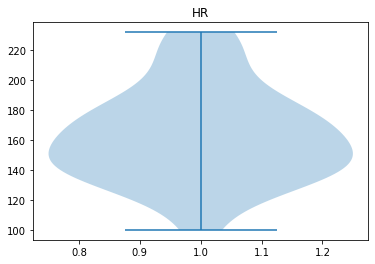

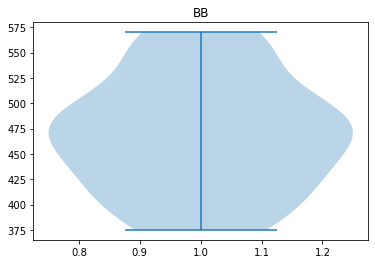

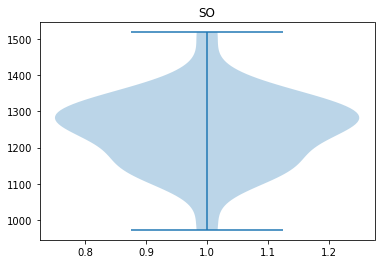

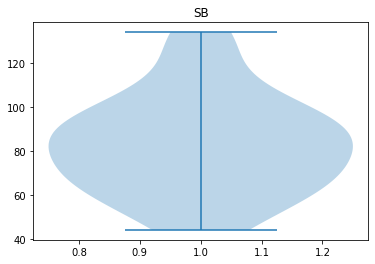

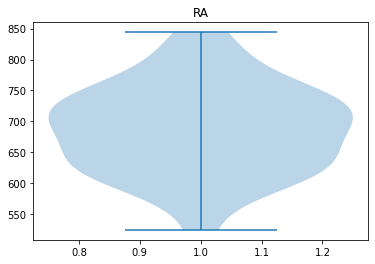

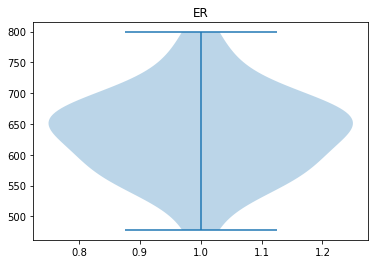

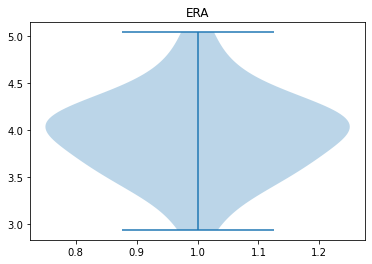

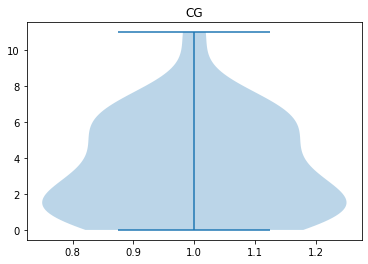

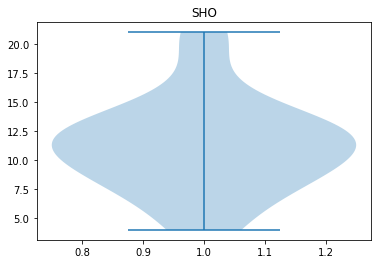

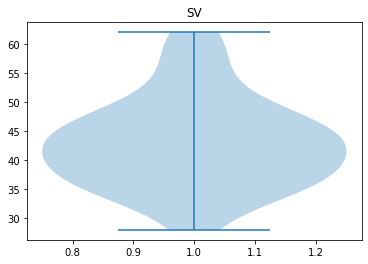

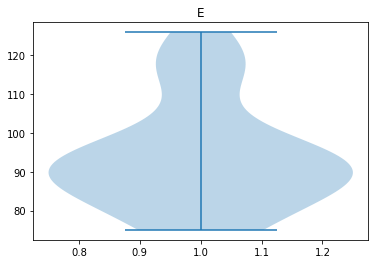

In [141]:
for i in baseball.iloc[:,1:]:
    plt.figure()
    plt.title(i)
    plt.violinplot(baseball[i])

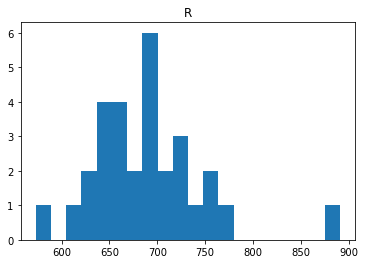

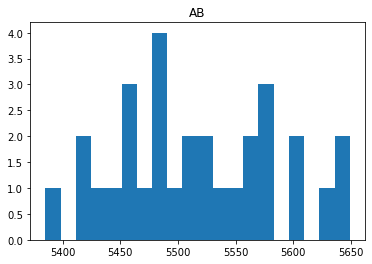

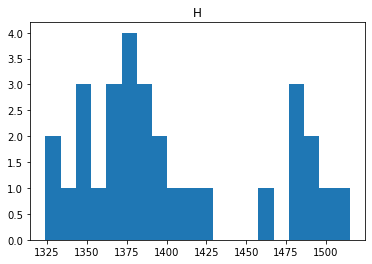

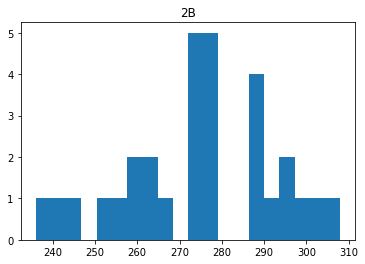

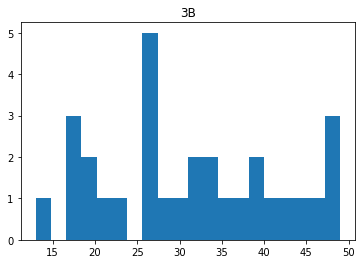

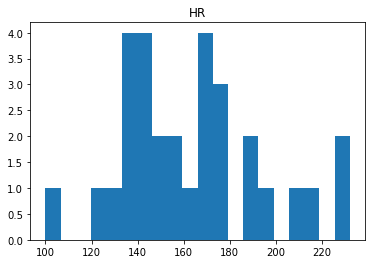

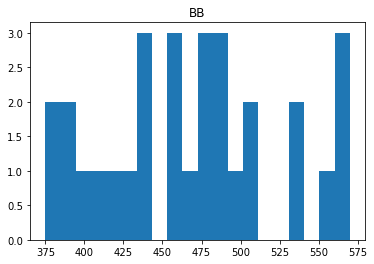

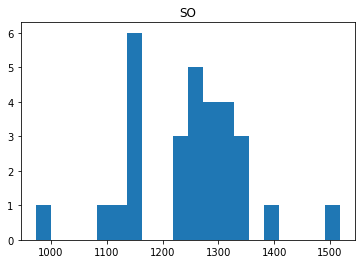

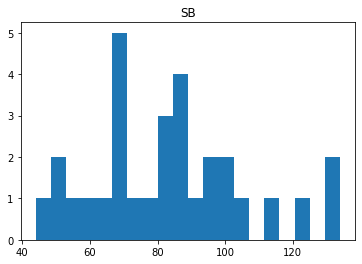

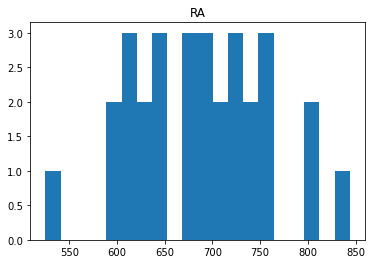

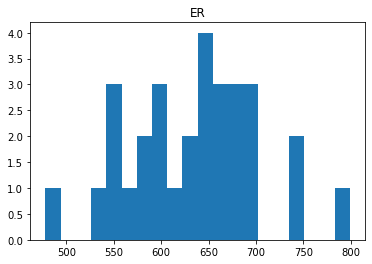

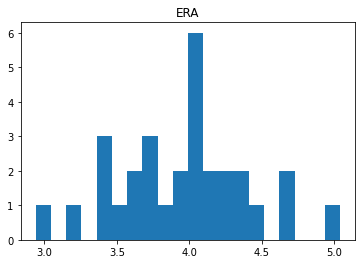

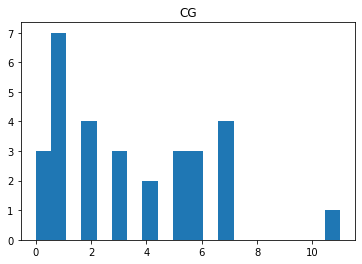

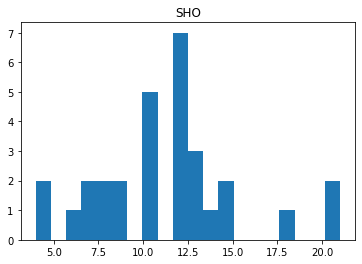

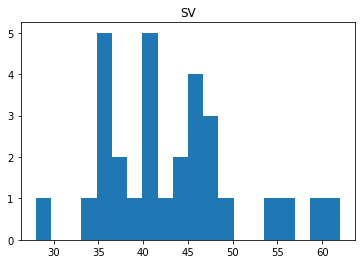

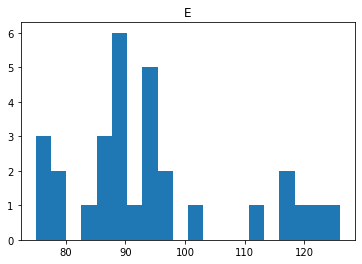

In [142]:
for i in baseball.iloc[:,1:]:
    plt.figure()
    plt.title(i)
    plt.hist(baseball[i],bins=20)

Observations from Violin and Histogram

1. Runs mostly stays between 600 to 780 with maximum count at around 700.
2. No of hits are mostly concentrated between 1350 to 1425 with maximum around 1370 to 1390. This shows that the possibility of hitting the ball stays between this range. Higher number of hits may lead to higher number of runs.
3. Doubles are maximum between 270 to 280 while the count of Triples aren't much and range only between 25 to 27.
4. Homerun is the best shot in a baseball game allowing hitter and other players on the bases(if any) to have a free run. Number of Homeruns are on the higher side between 130 to 180.
5. Number of Walks represent pitcher's failure. Four continous pitch which count as 'Ball' allow batter to go to next base freely. Maximum count of higher number of walks given range between 440 to 480 and around 560 to 570.
6. Earned run and Runs allowed are the runs provided by the pitcher. It ranges between 630 to 700 and 630 to 730 most number of times respectively. Higher ER and RA could result in higher opponent score and may result in defeat.

# Checking Correlation

In [49]:
baseball_cor=baseball.corr()
baseball_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<function matplotlib.pyplot.show(close=None, block=None)>

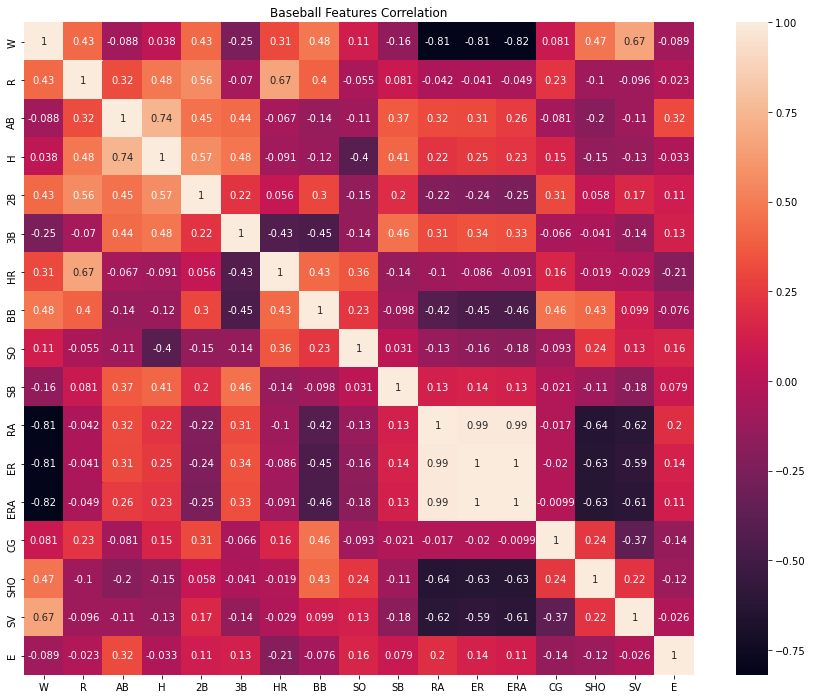

In [144]:
# Plotting Heat Map for correlation

plt.figure(figsize=(15,12))
plt.title('Baseball Features Correlation')
sns.heatmap(baseball_cor,annot=True)
plt.show

In [59]:
baseball_cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

As we see we observe highest correlation of Wins is with Saves. Eventually, higher the number of saves less is the opponent's score. 
Above data shows correlation with target column from higher to lowest.
We see Earned Run and Run Allowed has a high negative correlation with wins. These two allows opponent scoring thus have negative impact on Win. 

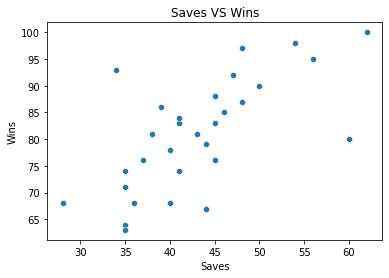

In [153]:
# Analysing Highly correlated column with target variable using Scatter Plot
plt.title('Saves VS Wins')
plt.xlabel('Saves')
plt.ylabel('Wins')
sns.scatterplot(baseball['SV'],baseball['W'])
plt.show()

# Checking Outliers

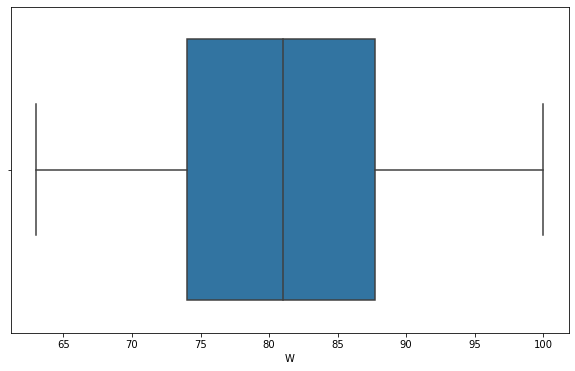

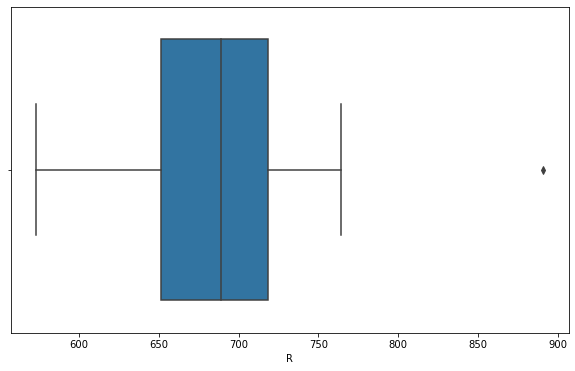

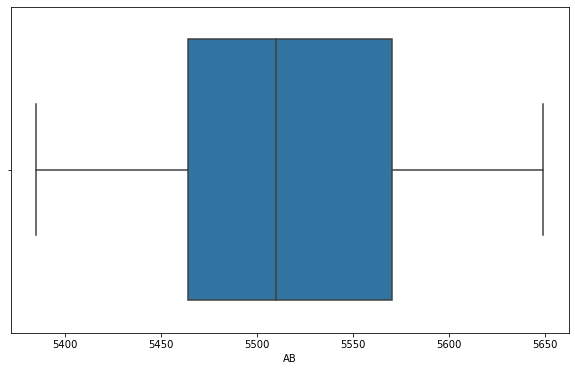

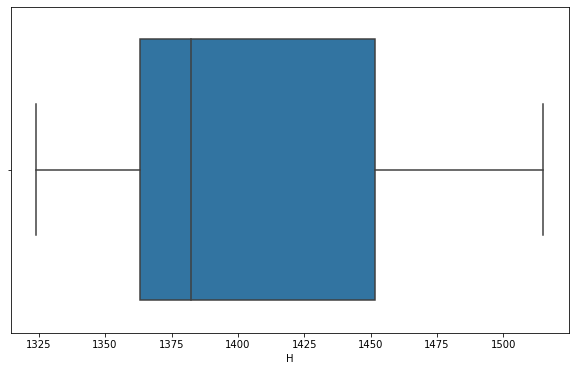

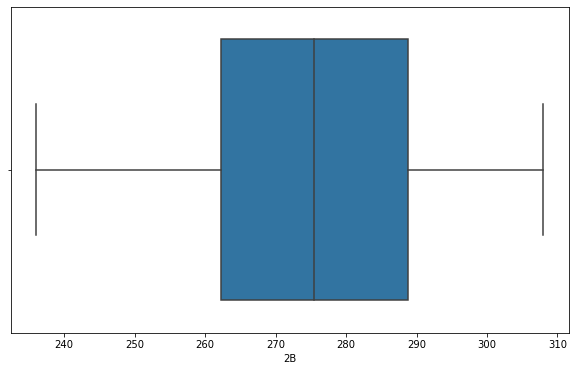

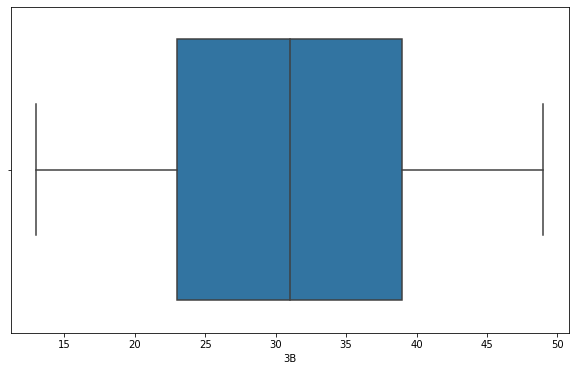

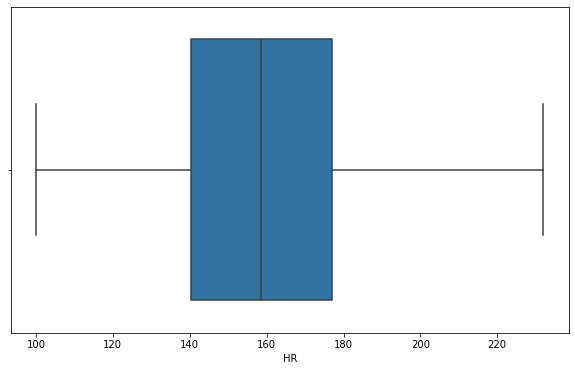

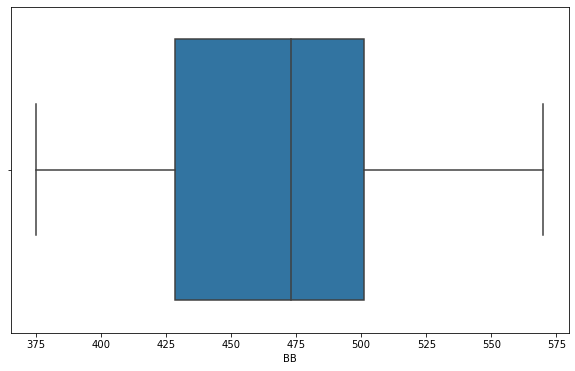

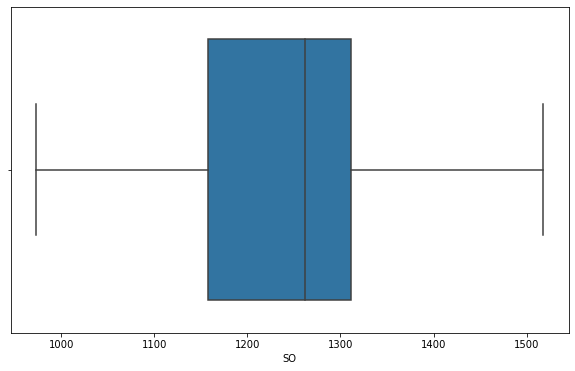

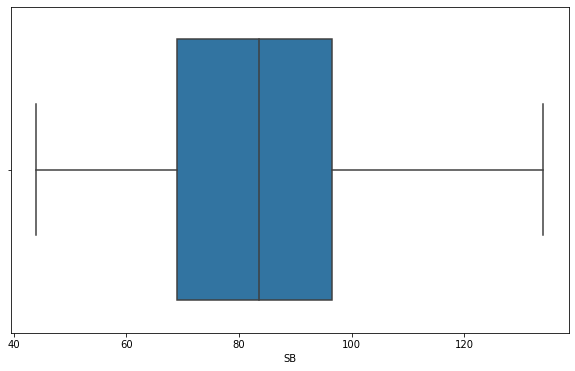

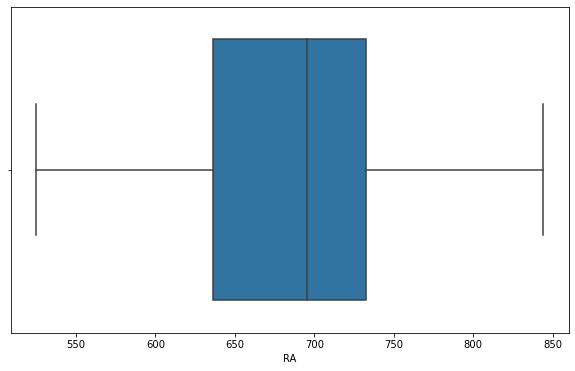

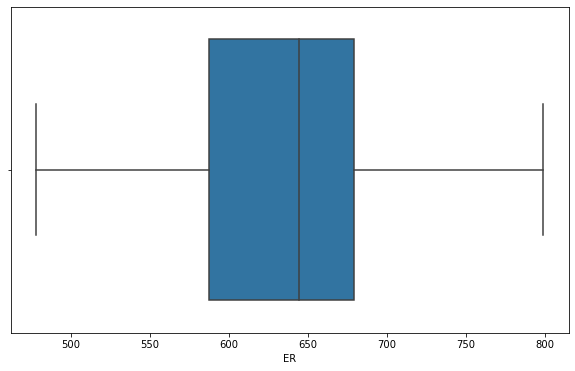

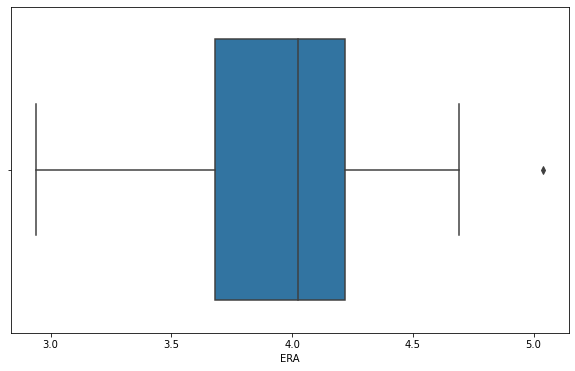

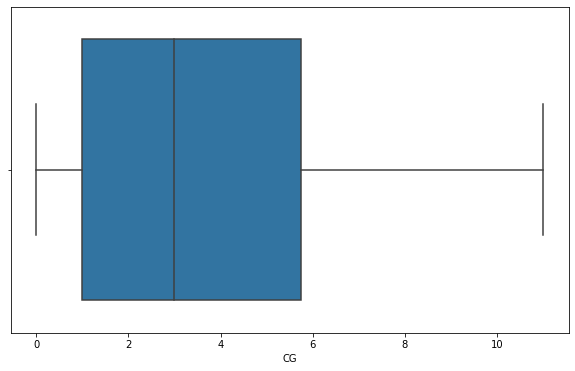

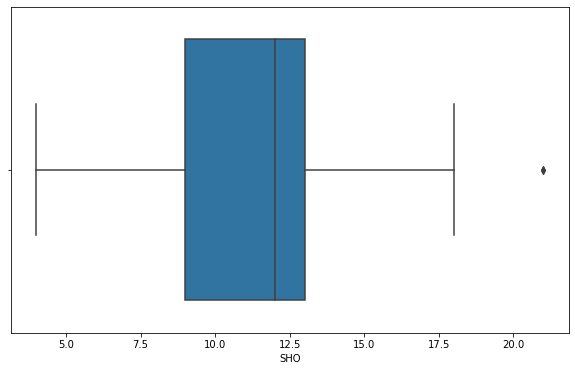

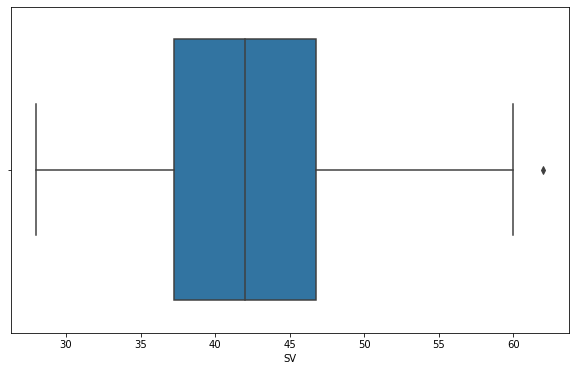

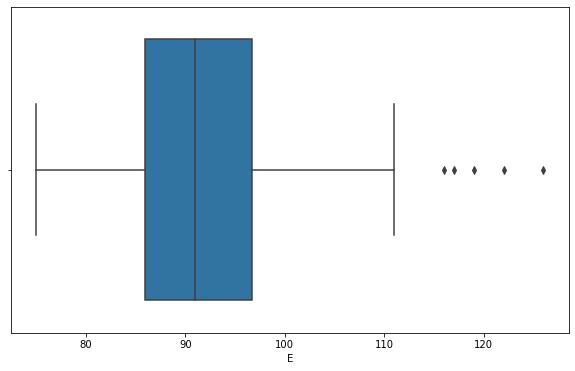

In [146]:
# Plotting Boxplot to detect outliers

for i in baseball.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(baseball[i],orient='v')
    plt.show()

No extreme outliers are detected. Some are detected in Errors column which are very near to whisker. Thus no outlier removing is required for now.

# Checking data distribution

In [154]:
baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

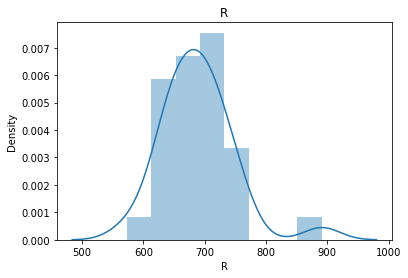

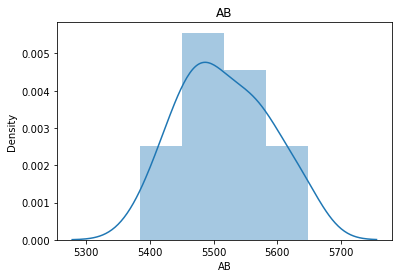

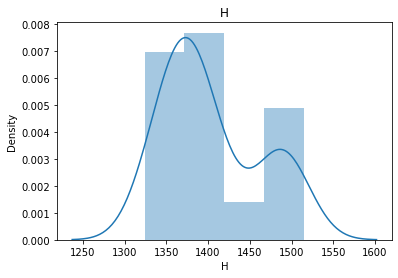

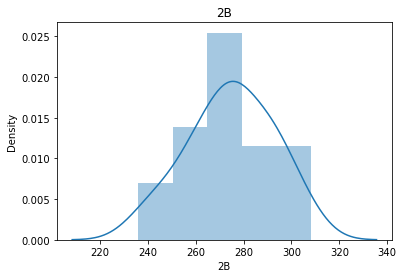

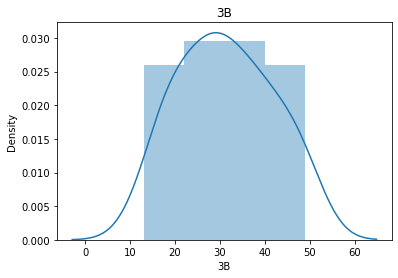

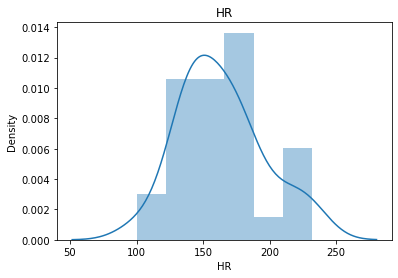

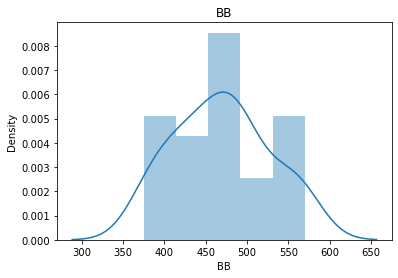

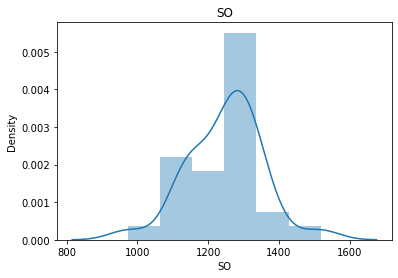

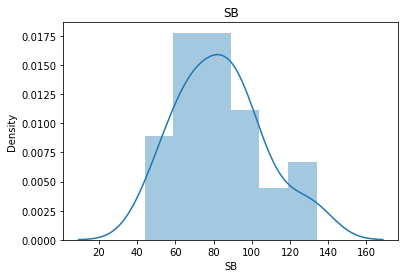

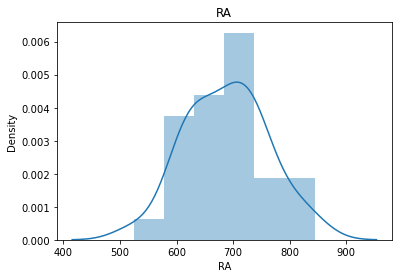

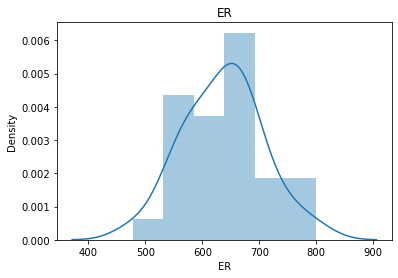

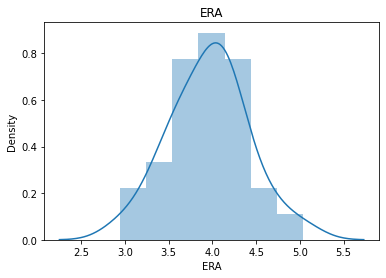

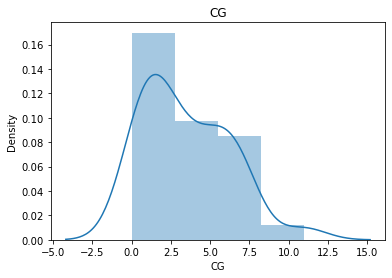

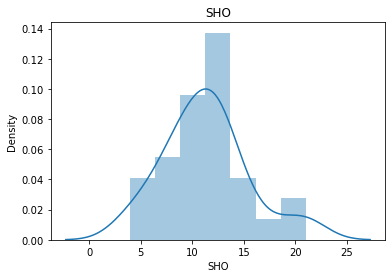

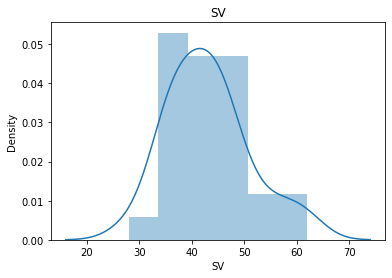

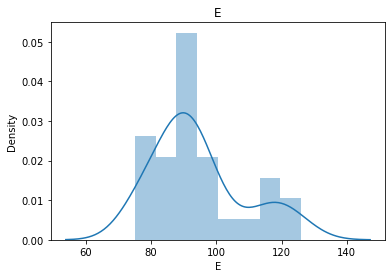

In [149]:
#Visualising Distribution

for i in baseball.iloc[:,1:]:
    plt.figure()
    plt.title(i)
    sns.distplot(baseball[i])

In [ ]:
We observe some skewness  in Runs, Complete Game, Saves and Error.

# Removing Skewness

In [ ]:
# Using Power Transform and Boxcox

from sklearn.preprocessing import power_transform
from scipy.stats import boxcox
baseball['R']=boxcox(baseball['R'],0)
baseball['CG']=power_transform(baseball['CG'].values.reshape(-1,1))
baseball['SV']=power_transform(baseball['SV'].values.reshape(-1,1))
baseball['E']=power_transform(baseball['E'].values.reshape(-1,1))
baseball.skew()

# Seperating Input and Target Variable

In [156]:
x=baseball.drop(['W'],axis=1)
y=baseball['W']
print(x.head(),'\n')
print(y.head(),'\n')
print(x.shape)
print(y.shape)

          R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  \
0  6.584791  5575  1497  300  42  139  383   973  104  641  601  3.73   
1  6.545350  5467  1349  277  44  156  439  1264   70  700  653  4.07   
2  6.505784  5439  1395  303  29  141  533  1157   86  640  584  3.67   
3  6.432940  5533  1381  260  27  136  404  1231   68  701  643  3.98   
4  6.535241  5605  1515  289  49  151  455  1259   83  803  746  4.64   

         CG  SHO        SV         E  
0 -0.359844    8  1.546378 -0.334953  
1 -0.359844   12  0.360444 -0.532211  
2  1.993513   10 -0.607594 -1.342331  
3  1.220103    9 -0.764453  0.678524  
4  1.220103   12 -1.095010 -0.532211   

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64 

(30, 16)
(30,)


# Scaling input data

In [157]:
# Using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [158]:
x_new=sc.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.665385,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.359844,-0.814629,1.546378,-0.334953
1,0.179624,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.359844,0.172800,0.360444,-0.532211
2,-0.307662,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.993513,-0.320914,-0.607594,-1.342331
3,-1.204801,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.220103,-0.567771,-0.764453,0.678524
4,0.055130,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.220103,0.172800,-1.095010,-0.532211
5,3.221588,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.220103,-0.320914,-1.269438,-0.334953
6,1.327690,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.064630,-1.802057,0.718082,0.104539
7,0.476828,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.729889,-0.320914,0.104606,-1.614550
8,-0.776717,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.909181,0.172800,1.905480,0.261504
9,1.067026,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.064630,-0.320914,-0.309109,0.409004


# Finding best Random State and Creating Train Test Split

In [159]:
# Importing Regression Algorithms
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [160]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    acc=r2_score(y_test,lr_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best R2 Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best R2 Score is :  0.9148202731472659  when Random state is :  301


In [161]:
# Setting Random state at 301

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=301)

In [164]:
# Defining Model List
model_list=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),ElasticNet()]

In [165]:
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',r2_score(y_train,model_pred_train))
    print('Testing Accuracy for the model ',m,' is: ',r2_score(y_test,model_pred))
    print('\n')

Training Accuracy for the model  LinearRegression()  is:  0.9528827234725097
Testing Accuracy for the model  LinearRegression()  is:  0.9148202731472659


Training Accuracy for the model  SVR()  is:  0.26155921728937437
Testing Accuracy for the model  SVR()  is:  0.10158369788376664


Training Accuracy for the model  DecisionTreeRegressor()  is:  1.0
Testing Accuracy for the model  DecisionTreeRegressor()  is:  -0.19394790602655787


Training Accuracy for the model  KNeighborsRegressor()  is:  0.8023177476118651
Testing Accuracy for the model  KNeighborsRegressor()  is:  0.5732124616956077


Training Accuracy for the model  RandomForestRegressor()  is:  0.9438371857717446
Testing Accuracy for the model  RandomForestRegressor()  is:  0.24993354187946837


Training Accuracy for the model  Lasso()  is:  0.8895660700190731
Testing Accuracy for the model  Lasso()  is:  0.8090914526880453


Training Accuracy for the model  ElasticNet()  is:  0.8693022970861339
Testing Accuracy for the model 

As we get best R2 score with Linear Regression, Lasso and Elastic Net we cross validate these models for any under or overfitting

# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [110]:
# Cross validating Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=r2_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -252.1939513391266 and the accuracy for testing is 91.4820273147266 


At crossfold 3 the CV score of is 10.073896965607709 and the accuracy for testing is 91.4820273147266 


At crossfold 4 the CV score of is 5.162843405861 and the accuracy for testing is 91.4820273147266 


At crossfold 5 the CV score of is 7.285278207498387 and the accuracy for testing is 91.4820273147266 


At crossfold 6 the CV score of is 28.73951663292736 and the accuracy for testing is 91.4820273147266 


At crossfold 7 the CV score of is 25.5750551784104 and the accuracy for testing is 91.4820273147266 


At crossfold 8 the CV score of is 34.82355260220092 and the accuracy for testing is 91.4820273147266 


At crossfold 9 the CV score of is -711.954640329594 and the accuracy for testing is 91.4820273147266 




In [111]:
# Cross validating Lasso Regression

ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
testing_accu=r2_score(y_test,ls_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(ls,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 46.84886549169579 and the accuracy for testing is 80.90914526880452 


At crossfold 3 the CV score of is 73.3441128088272 and the accuracy for testing is 80.90914526880452 


At crossfold 4 the CV score of is 80.31032511442844 and the accuracy for testing is 80.90914526880452 


At crossfold 5 the CV score of is 58.24110979042242 and the accuracy for testing is 80.90914526880452 


At crossfold 6 the CV score of is 66.12009596629352 and the accuracy for testing is 80.90914526880452 


At crossfold 7 the CV score of is 59.29720179231367 and the accuracy for testing is 80.90914526880452 


At crossfold 8 the CV score of is 65.12374008339073 and the accuracy for testing is 80.90914526880452 


At crossfold 9 the CV score of is -437.3231614560685 and the accuracy for testing is 80.90914526880452 




In [166]:
# Cross validating ElasticNet Regression

eln=ElasticNet()
eln.fit(x_train,y_train)
eln_pred=eln.predict(x_test)
testing_accu=r2_score(y_test,eln_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(eln,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 26.732846158158814 and the accuracy for testing is 74.0301731726034 


At crossfold 3 the CV score of is 66.16638531736962 and the accuracy for testing is 74.0301731726034 


At crossfold 4 the CV score of is 72.05218320097002 and the accuracy for testing is 74.0301731726034 


At crossfold 5 the CV score of is 42.84003785717657 and the accuracy for testing is 74.0301731726034 


At crossfold 6 the CV score of is 60.7827426057243 and the accuracy for testing is 74.0301731726034 


At crossfold 7 the CV score of is 49.99880689985501 and the accuracy for testing is 74.0301731726034 


At crossfold 8 the CV score of is 57.04168787592438 and the accuracy for testing is 74.0301731726034 


At crossfold 9 the CV score of is -764.8893775507552 and the accuracy for testing is 74.0301731726034 




As we see we get the best R2 score and Cross validation of 80% at CV=4 with Lasso Regression. Thus we move ahead with this model and further hypertune to check for improvement in accuracy. 

# Hyper Parameter Tuning

In [22]:
# Importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [167]:
# Checking for Lasso Regression
# Defining Parameters

ls=Lasso()
parameters={'random_state':list(range(0,10)),'alpha' : [0.0001,0.001,0.01,0.1,1,10]}
gcv_l= GridSearchCV(estimator=ls,param_grid=parameters,scoring='r2')

In [168]:
gcv_l.fit(x_train,y_train)
gcv_l.best_params_

{'alpha': 1, 'random_state': 0}

Applying best parameters and training model with Lasso Regression

In [169]:
# Lasso Regression
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
testing_accu=r2_score(y_test,ls_pred)*100

cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()*100
print(f'The CV score of the model is {cv_mean} and the R2 Score for testing is {testing_accu} ')
print('\n')

print('Mean Squared Error of the model is : ',mean_squared_error(y_test,ls_pred))
print('Mean Absolute Error of the model is : ',mean_absolute_error(y_test,ls_pred))
print('Root Mean Squared Error of the model is : ',np.sqrt(mean_squared_error(y_test,ls_pred)),'\n')

The CV score of the model is 80.31032511442844 and the R2 Score for testing is 80.90914526880452 


Mean Squared Error of the model is :  18.459206698113935
Mean Absolute Error of the model is :  3.696465596638305
Root Mean Squared Error of the model is :  4.2964178914665565 



# Plotting the Graph

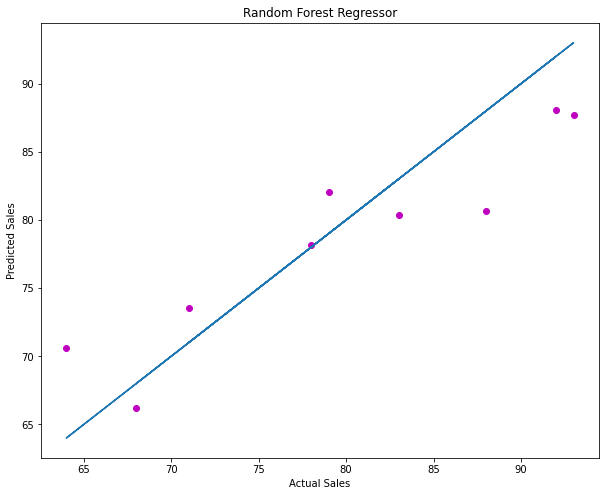

In [170]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=ls_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Random Forest Regressor")
plt.show()

# Saving the Model

In [171]:
# Using Pickle

import pickle
filename='baseball.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion

In [118]:
# Loading the model

load_model=pickle.load(open('baseball.pkl','rb'))

In [119]:
# Checking model score

result=load_model.score(x_test,y_test)
print(result)

0.8090914526880453


In [172]:
# Creatig dataframe for Test and Predicted Values

conclusion=pd.DataFrame([ls.predict(x_test)[:],ls_pred[:]],index=['Predicted','Original'])

In [173]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,66.217025,80.668313,88.096015,73.555006,87.708482,78.142743,70.568675,80.335693,82.027295
Original,66.217025,80.668313,88.096015,73.555006,87.708482,78.142743,70.568675,80.335693,82.027295
